In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dupes_data = total_data.loc[total_data["Mouse ID"] == mice_dupes_id[0]]
mice_dupes_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [466]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [467]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

#to debug!!!! worth 2 points, moving on for now,  should be 248 but i'm not seeing the pproblem

249

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})
drug_reg_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

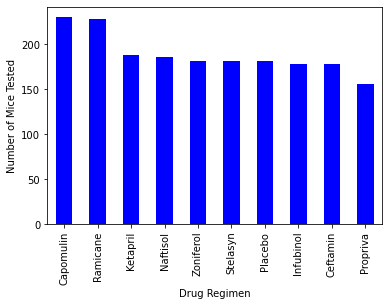

In [176]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
mice_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]


#find count per drug
mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
mice_per_drug



#Use DataFrame.plot() in order to create a bar chart of the data
mice_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()

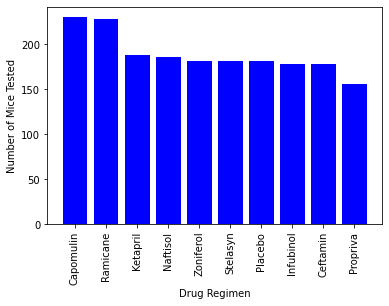

In [174]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

#graph build and display
plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()


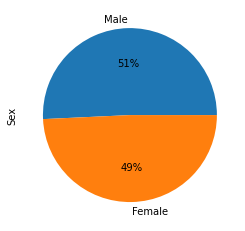

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_total_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

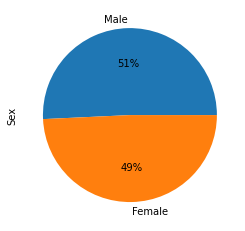

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [449]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") | (clean_total_data["Drug Regimen"] == "Ramicane") |
                                        (clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]


#Start by getting the last (greatest) timepoint for each mouse
last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()
# reduce_last_tp=reduced_drug_data[reduced_drug_data[["Drug Regimen", "Tumor Volume (mm3)"]]]
reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [478]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment


# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []


#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    #list containing upper and lower quartiles of drug final timor volume 
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list

    #Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
    
   
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# for row in 
#     capomulin_df

iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


Text(0.5, 0, '')

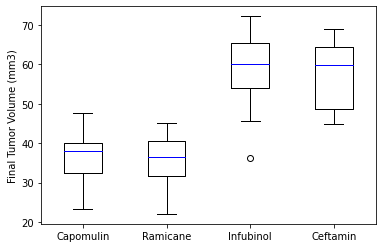

In [453]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')


## Line and Scatter Plots

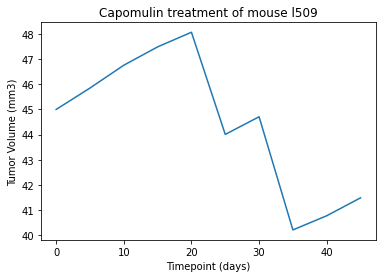

In [243]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#create dataframe with just Capolumin data
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


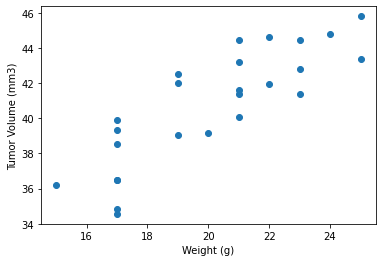

In [302]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


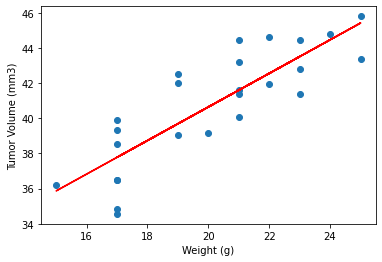

In [304]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=capomulin_avg_df["Weight (g)"]
y_values=capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()